In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 21. Histogram Normalization

**Detail: Implement histogram normalization**

It can be seen that the histogram has a bias. For example, if there are many pixels close to 0, the image will be dark overall, and if there are many pixels close to 255, the image will be bright. The local bias of the histogram is expressed as a **narrow dynamic range**. Therefore, processing such as normalization and flattening of the histogram is necessary to make the image easy to be viewed by the human eye.

This histogram normalization is called **gray-scale transformation**, and can be realized by the following equation when converting an image having pixel values of [c,d] into a range of [a,b]. This time, *imori_dark.jpg* is converted to the range of [0,255] respectively.

```bash
xout = {
          a                                     (xin < c)
         (b-a)/(d-c) * (xin-c) + a              (c <= xin <= d)
          b                                     (d < xin)
       }
```

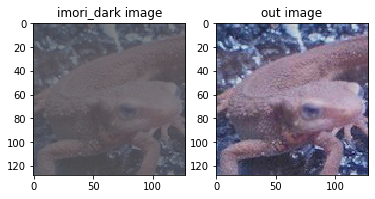

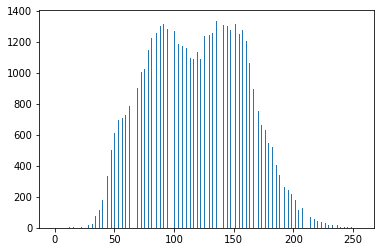

In [2]:
img = cv2.imread("Dataset/others/imori_dark.jpg")
H, W, C = img.shape

# Trans [0, 255]
a, b = 0., 255.

vmin = img.min()
vmax = img.max()

out = img.copy()
out[out < a] = a
out[out > b] = b
out = (b - a) / (vmax - vmin) * (out - vmin) + a
out = out.astype(np.uint8)

# Display histogram
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 22. Histogram Operation

This is not a change in the dynamic range of the histogram but an operation to change the histogram to be flat. 

To achieve this, we can use the following equation to transforom the histogram of $m$ mean value with $s$ standard deviation to mean value of $m_0$ with standard deviation of $s_0$ histogram.
 $$ x_{out}=\frac{s_0}{s}\cdot (x_{in}-m)+m_0 $$
```bash
Z-Score: (X-mean)/std
```

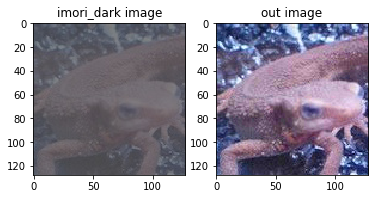

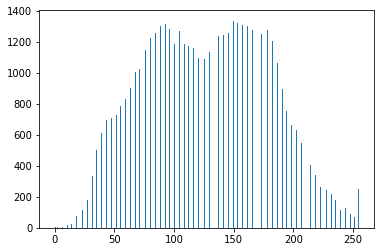

In [3]:
img = cv2.imread("Dataset/others/imori_dark.jpg")
H, W, C = img.shape

m0 = 128
s0 = 52

m = np.mean(img)
s = np.std(img)

out = img.copy()
out = s0/s *(out-m)+m0
out[out < 0] = 0
out[out > 255] = 255

out = out.astype(np.uint8)

# Display histogram
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 23. Histogram Equalization

**Detail: Implement histogram flattening**. 

Histogram flattening is an operation for changing the histogram to be **flat**, and is an operation for balancing the histogram values **without requiring the above-mentioned average value or standard deviation**.

This defined by the following equation.

- S: total number of pixel values
- Zmax: maximum value of pixel values
- h(z): frequency of density z

$$ Z^{'} = \frac{Zmax}{S}\sum_{i=0}^{z}h(i)$$

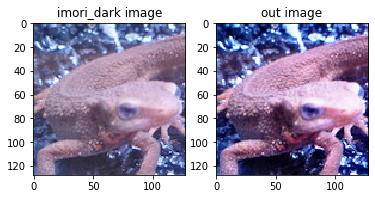

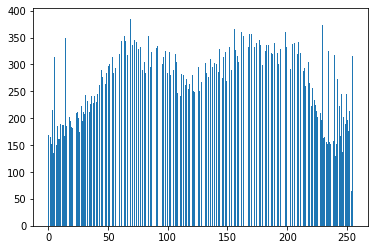

In [4]:
img = cv2.imread("Dataset/others/imori.jpg")
H, W, C = img.shape

# Histogram flattening
S = H * W * C *1

out = img.copy().astype(np.float)
sum_h = 0
z_max = 255

for i in range(1,255):
    ind = np.where(img==i)
    sum_h += len(img[ind])
    z_prime = z_max/S * sum_h
    out[ind] = z_prime

out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 24. Gamma Correction

**Detail: Perform gamma correction (c = 1, g = 2.2) on imori_gamma.jpg**

Gamma correction is correction when pixel values are converted non-linearly via a device such as a camera. When an image is displayed as it is on a screen, it becomes dark. **Therefore, it is an object of gamma correction to perform image display excluding the characteristics of the display by increasing the values of RGB in advance.**

The non-linear transformation is shown in the following equation.

- x: is normalized to [0, 1].
- c: constant
- g: gamma characteristic (usually 2.2)

> x' = c * Iin ^ g

Therefore, gamma correction is performed by the following equation.
> Iout = (1/c * Iin) ^ (1/g)

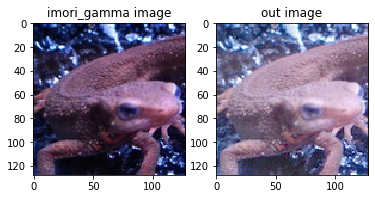

In [5]:
img = cv2.imread("Dataset/others/imori_gamma.jpg")

# Gamma correction
c = 1.
g = 2.2

out = img.copy().astype(np.float)
out /= 255
out = (1/c*out) ** (1/g)

out *= 255
out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_gamma image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 25. Nearest Neighbor Interpolation

**Detail: Enlarge the image 1.5 times by nearest neighbor interpolation.**

Nearest neighbor interpolation is a method of using the nearest pixel as it is when enlarging an image. Simple and fast processing speed, but the image quality is significantly degraded.

Interpolated by the following equation.

- I': the image after enlargement,
- I : the image before enlargement
- a : the magnification
- []: rounding off
![NNI](Dataset/others/25_nni_fig.png)

> I'(x,y) = I([x/a],[y/a])

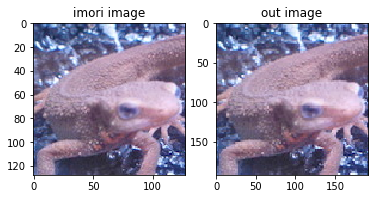

In [6]:
img = cv2.imread("Dataset/others/imori.jpg")
H, W, C = img.shape

# Nearest Neighbor
a = 1.5
aH = int(a*H)
aW = int(a*W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = np.round(y/a).astype(np.int)
x = np.round(x/a).astype(np.int)

out = img[y,x]
out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 26. Bi-linear Interpolation

**Detail: Enlarge the image 1.5 times with Bi-linear interpolation.**

Bi-linear interpolation is a method of complementing by weighting the four surrounding pixels according to the distance.

Although the processing time is increased as the amount of calculation is large, deterioration of the image quality can be supressed.

![NNI](Dataset/others/26_bil_fig1.png)

- 1. The coordinates (x', y') of the magnified image are divided by the magnification ratio a to obtain floor (x'/a,y'/a).
- 2. Four pixels around (x'/a,y'/a) of the original image, I(x,y), I(x+1,y), I(x,y+1), I(x+1,y+1)
```bash   
 I(x, y)     I(x+1, y)
      * (x'/a, y'/a)
 I(x, y+1)   I(x+1, y+1)
```
- 3. The distance **d** between each pixel and (x'/a, y'/a) is determined and weighted. **w = d / Sum d**
- 4. The pixel (x', y') of the enlarged image is determined by the following equation. dx = x'/a-x, dy = y'/a-y
    
> I'(x',y') = (1-dx)(1-dy)I(x,y) + dx(1-dy)I(x+1,y) + (1-dx)dyI(x, y+1) + dxdyI(x+1, y+1)



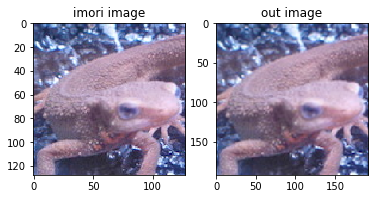

In [7]:
img = cv2.imread("Dataset/others/imori.jpg")
H, W, C = img.shape

# Bi-lenear
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))

y = (y/a)
x = (x/a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W - 2)
iy = np.minimum(iy, H - 2)

dx = x - ix
dy = y - iy

dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

out = (1 - dx) * (1 - dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix + 1] + (1 - dx) * dy * img[iy + 1, ix] + dx * dy * \
      img[iy + 1, ix + 1]

out[out > 255] = 255
out = out.astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 27. Bi-cubic Interpolation

**Detail: Enlarge the image 1.5 times by Bi-cubic interpolation.**
Bi-cubic interpolation is an extension of Bi-linear interpolation, and performs interpolation from surrounding 16 pixels.
![NNI](Dataset/others/27_bci_fig.png)
```bash
I(x-1, y-1) I(x, y-1) I(x+1, y-1) I(x+2, y-1)
I(x-1, y)   I(x, y)   I(x+1, y)   I(x+2, y)
I(x-1, y+1) I(x, y+1) I(x+1, y+1) I(x+2, y+1)
I(x-1, y+2) I(x, y+2) I(x+1, y+2) I(x+2, y+2)
```
The distance to each pixel is determined as in the following equation.

dx1 = x'/a - (x-1), dx2 = x'/a - x, 

dx3 = (x+1) - x'/a, dx4 = (x+2) - x'/a

dy1 = y'/a - (y-1), dy2 = y'/a - y,

dy3 = (y+1) - y'/a, dy4 = (y+2) - y'/a

The weight is determined by the distance according to the following function: a is often -1.
```bash
h(t) = { (a+2)|t|^3 - (a+3)|t|^2 +1      (when |t|<=1)
          a|t|^3 - 5a|t|^2 + 8a|t| - 4a  (when 1<|t|<=2)
          0                              (when 2<|t|)
}
```
Using these pixels and weights, the pixels of the enlarged image are calculated by the following equation pixel multiplied by the weight is divided by the sum of the weights.

I'(x', y') = (Sum {i=-1:2} {j=-1:2} I(x+i, y+j) * wxi * wyj) / Sum{i=-1:2}{j=-1:2} wxi * wyj



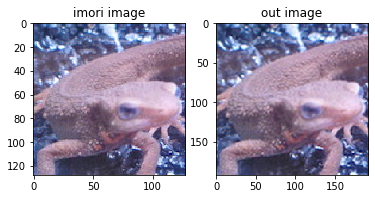

In [62]:
# Bi-cubic Interpolation
def bc_interpolate(img, ax=1., ay=1.):
    H, W, C = img.shape

    aH = int(ay * H)
    aW = int(ax * W)

    # get positions of resized image
    y = np.arange(aH).repeat(aW).reshape(aW, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    y = (y / ay)
    x = (x / ax)

    # get positions of original image
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)

    ix = np.minimum(ix, W-1)
    iy = np.minimum(iy, H-1)

    # get distance of each position of original image
    dx2 = x - ix
    dy2 = y - iy
    dx1 = dx2 + 1
    dy1 = dy2 + 1
    dx3 = 1 - dx2
    dy3 = 1 - dy2
    dx4 = 1 + dx3
    dy4 = 1 + dy3

    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]

    # bi-cubic weight
    def weight(t):
        a = -1.
        at = np.abs(t)
        w = np.zeros_like(t)
        ind = np.where(at <= 1)
        w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
        ind = np.where((at > 1) & (at <= 2))
        w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
        return w

    w_sum = np.zeros((aH, aW, C), dtype=np.float32)
    out = np.zeros((aH, aW, C), dtype=np.float32)

    # interpolate
    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(ix + i, 0), W-1)
            ind_y = np.minimum(np.maximum(iy + j, 0), H-1)

            wx = weight(dxs[i+1])
            wy = weight(dys[j+1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

            w_sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]

    out /= w_sum
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread("Dataset/others/imori.jpg").astype(np.float32)

# Bi-cubic interpolation
out = bc_interpolate(img, ax=1.5, ay=1.5)

img = img.astype(np.uint8)
out = out.astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 28-30 Affine Transformation

![NNI](Dataset/others/28_at_fig.jpg)

### 28. Affine Transformation (Translation)
Translate the image by +30 in the x direction and -30 in the y direction using affine transformation.

Affine transformation is an operation that transforms an image using a 3x3 matrix.

The conversion is (1) translation (Q.28) (2) scaling(Q.29) (3) roataion(Q.30) (4)skew(Q.31)

The original image is (x, y), and the converted image is (x', y'). The scaling of the image is expressed by the following equation.

```
[ x'] = [a b][x]
  y      c d  y

```
On the other hand, parallel movement is expressed by the following equation.

```
[ x' ] = [x] + [tx]
  y       y  +  ty
```
Summarizing the above into one equation, we obtain the following equation, which is an affine transformation.

```
  x'       a b tx   x
[ y' ] = [ c d ty][ y ]
  1        0 0  1   1
```
The following equation is used for parallel movement.

```
  x'       a b tx    x
[ y' ] = [ c d ty ][ y]
  1        0 0  1    1
```

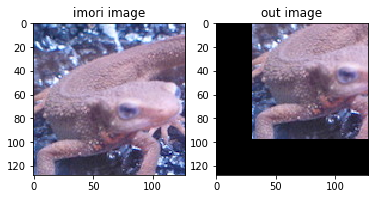

In [66]:
def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape
    # temporary image
    _img = img
    img = np.zeros((H+2, W+2, C), dtype = np.float32)
    img[1:H+1, 1:W+1] = _img
    
    # get new image shape
    H_new = np.round(H * d).astype(np.int)
    W_new = np.round(W * a).astype(np.int)
    
    out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)
    
    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(H_new).reshape(H_new, -1)
    
    # get position of original image by affine
    adbc = a * d - b * c
    x = np.round(( d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1
    
    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)
    
    # assign pixcel to new image
    out[y_new, x_new] = img[y, x]
    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)
    
    return out
    
# Read image
img = cv2.imread("Dataset/others/imori.jpg").astype(np.float32)

# Affine
out = affine(img, a=1, b=0, c=0, d=1, tx=30, ty=-30)

img = img.astype(np.uint8)
out = out.astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 29. Affine Transformation (Scaling)

1. Resize 1.3 times in x direction


2. 0.8 times in y direction using affine transformation.

Also, in addition to the conditions of (2) and (1), simultaneously realize parallel movement of +30 in the x direction and -30 in the y direction.

In [ ]:
# Read image
_img = cv2.imread("Dataset/others/imori.jpg").astype(np.float32)

H, W, C = _img.shape

# Affine